In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import List, Optional


import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import xgboost as xgb
import catboost as cb
from scipy.stats import skew, kurtosis
from sklearn.impute import KNNImputer
import lightgbm as lgbm
from copy import deepcopy


%matplotlib inline


import warnings
warnings.simplefilter("ignore")

In [2]:
df_train = pd.read_csv('/Kaggle/input/geekbrains-competitive-data-analysis/train.csv')
df_test = pd.read_csv('/Kaggle/input/geekbrains-competitive-data-analysis/test.csv')
df_profile = pd.read_csv('/Kaggle/input/geekbrains-competitive-data-analysis/client_profile.csv')

In [3]:
df_train.head()

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE
0,123687442,0,Cash
1,123597908,1,Cash
2,123526683,0,Cash
3,123710391,1,Cash
4,123590329,1,Cash


In [4]:
df_test.head()

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE
0,123724268,Cash
1,123456549,Cash
2,123428178,Credit Card
3,123619984,Cash
4,123671104,Cash


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110093 entries, 0 to 110092
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   APPLICATION_NUMBER  110093 non-null  int64 
 1   TARGET              110093 non-null  int64 
 2   NAME_CONTRACT_TYPE  110093 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165141 entries, 0 to 165140
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   APPLICATION_NUMBER  165141 non-null  int64 
 1   NAME_CONTRACT_TYPE  165141 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [7]:
df_profile.head()

,APPLICATION_NUMBER,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,...,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123666076,F,0,157500.0,270000.0,13500.0,Incomplete higher,Civil marriage,0.008068,8560,...,2.0,0.329471,0.236315,0.678568,0.0,0.0,0.0,0.0,1.0,2.0
1,123423688,F,0,270000.0,536917.5,28467.0,Secondary / secondary special,Married,0.020246,23187,...,2.0,NaN,0.442295,0.802745,0.0,0.0,0.0,0.0,1.0,1.0
2,123501780,M,1,427500.0,239850.0,23850.0,Incomplete higher,Married,0.072508,14387,...,3.0,0.409017,0.738159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123588799,M,0,112500.0,254700.0,17149.5,Secondary / secondary special,Married,0.019101,14273,...,2.0,NaN,0.308994,0.590233,0.0,0.0,0.0,0.0,0.0,3.0
4,123647485,M,0,130500.0,614574.0,19822.5,Lower secondary,Married,0.022625,22954,...,2.0,NaN,0.739408,0.156640,0.0,0.0,1.0,0.0,0.0,6.0


In [8]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   APPLICATION_NUMBER          250000 non-null  int64  
 1   GENDER                      250000 non-null  object 
 2   CHILDRENS                   250000 non-null  int64  
 3   TOTAL_SALARY                250000 non-null  float64
 4   AMOUNT_CREDIT               250000 non-null  float64
 5   AMOUNT_ANNUITY              249989 non-null  float64
 6   EDUCATION_LEVEL             250000 non-null  object 
 7   FAMILY_STATUS               250000 non-null  object 
 8   REGION_POPULATION           250000 non-null  float64
 9   AGE                         250000 non-null  int64  
 10  DAYS_ON_LAST_JOB            250000 non-null  int64  
 11  OWN_CAR_AGE                 85041 non-null   float64
 12  FLAG_PHONE                  250000 non-null  int64  
 13  FLAG_EMAIL    

In [11]:
knn_imputer = KNNImputer(n_neighbors=25, weights="uniform")
for i in profile_missing:
    df_profile[i] = knn_imputer.fit_transform(df_profile[[i]])

In [9]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   APPLICATION_NUMBER          250000 non-null  int64  
 1   GENDER                      250000 non-null  object 
 2   CHILDRENS                   250000 non-null  int64  
 3   TOTAL_SALARY                250000 non-null  float64
 4   AMOUNT_CREDIT               250000 non-null  float64
 5   AMOUNT_ANNUITY              249989 non-null  float64
 6   EDUCATION_LEVEL             250000 non-null  object 
 7   FAMILY_STATUS               250000 non-null  object 
 8   REGION_POPULATION           250000 non-null  float64
 9   AGE                         250000 non-null  int64  
 10  DAYS_ON_LAST_JOB            250000 non-null  int64  
 11  OWN_CAR_AGE                 85041 non-null   float64
 12  FLAG_PHONE                  250000 non-null  int64  
 13  FLAG_EMAIL    

In [10]:
def calculate_feature_separating_ability(
    features: pd.DataFrame, target: pd.Series, fill_value: float = -9999) -> pd.DataFrame:
    """
    Оценка разделяющей способности признаков с помощью метрики GINI.

    Parameters
    ----------
    features: pandas.core.frame.DataFrame
        Матрица признаков.

    target: pandas.core.frame.Series
        Вектор целевой переменной.

    fill_value: float, optional, default = -9999
        Значение для заполнения пропусков в значении признаков.
        Опциональный параметр, по умолчанию, равен -9999;

    Returns
    -------
    scores: pandas.core.frame.DataFrame
        Матрица важности признаков.

    """
    scores = {}
    for feature in features:
        score = roc_auc_score(
            target, features[feature].fillna(fill_value)
        )
        scores[feature] = 2*score - 1

    scores = pd.Series(scores)
    scores = scores.sort_values(ascending=False)

    return scores

In [11]:
numerical = df_profile.select_dtypes(exclude=["object"])
numerical = numerical.merge(df_train["APPLICATION_NUMBER"], how="right", on="APPLICATION_NUMBER")

scores = calculate_feature_separating_ability(
    numerical, df_train["TARGET"]
)
scores.head(n=10)

CHILDRENS                     0.026050
FAMILY_SIZE                   0.011430
AMOUNT_ANNUITY               -0.002536
FLAG_EMAIL                   -0.003034
APPLICATION_NUMBER           -0.004743
OWN_CAR_AGE                  -0.017952
AMT_REQ_CREDIT_BUREAU_YEAR   -0.018639
FLAG_PHONE                   -0.021521
TOTAL_SALARY                 -0.026845
AMOUNT_CREDIT                -0.028179
dtype: float64

In [12]:
def create_numerical_aggs(data: pd.DataFrame,
                          groupby_id: str,
                          aggs: dict,
                          prefix: Optional[str] = None,
                          suffix: Optional[str] = None,
                          ) -> pd.DataFrame:
    """
    Построение агрегаций для числовых признаков.

    Parameters
    ----------
    data: pandas.core.frame.DataFrame
        Выборка для построения агрегаций.

    groupby_id: str
        Название ключа, по которому нужно произвести группировку.

    aggs: dict
        Словарь с названием признака и списка функций.
        Ключ словаря - название признака, который используется для
        вычисления агрегаций, значение словаря - список с названием
        функций для вычисления агрегаций.

    prefix: str, optional, default = None
        Префикс для названия признаков.
        Опциональный параметр, по умолчанию, не используется.

    suffix: str, optional, default = None
        Суффикс для названия признаков.
        Опциональный параметр, по умолчанию, не используется.

    Returns
    -------
    stats: pandas.core.frame.DataFrame
        Выборка с рассчитанными агрегациями.

    """
    if not prefix:
        prefix = ""
    if not suffix:
        suffix = ""

    data_grouped = data.groupby(groupby_id)
    stats = data_grouped.agg(aggs)
    stats.columns = [f"{prefix}{feature}_{stat}{suffix}".upper() for feature, stat in stats]
    stats = stats.reset_index()

    return stats

In [14]:
aggs = {
    "TOTAL_SALARY": ["mean"],
    "AMOUNT_CREDIT": ["mean"],
}

stats = create_numerical_aggs(
    df_profile, groupby_id="EDUCATION_LEVEL", aggs=aggs, suffix="_BY_EDUCATION"
)
stats

,EDUCATION_LEVEL,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION
0,Academic degree,244621.323529,729561.606618
1,Higher education,208989.672806,689809.957142
2,Incomplete higher,181446.844502,565921.004786
3,Lower secondary,130223.217137,491498.704966
4,Secondary / secondary special,155414.744584,571624.325064


In [15]:
profile_stats = df_profile[["APPLICATION_NUMBER", "EDUCATION_LEVEL", "TOTAL_SALARY", "AMOUNT_CREDIT"]]
profile_stats = profile_stats.merge(
    stats, how="left", on="EDUCATION_LEVEL"
)
profile_stats["TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION"] = profile_stats["TOTAL_SALARY"] / profile_stats["TOTAL_SALARY_MEAN_BY_EDUCATION"]
profile_stats["DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION"] = profile_stats["TOTAL_SALARY"] - profile_stats["TOTAL_SALARY_MEAN_BY_EDUCATION"]
profile_stats.head(n=3)

,APPLICATION_NUMBER,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION
0,123666076,Incomplete higher,157500.0,270000.0,181446.844502,565921.004786,0.868023,-23946.844502
1,123423688,Secondary / secondary special,270000.0,536917.5,155414.744584,571624.325064,1.737287,114585.255416
2,123501780,Incomplete higher,427500.0,239850.0,181446.844502,565921.004786,2.356062,246053.155498


In [16]:
df_train = df_train.merge(
    profile_stats, how="left", on="APPLICATION_NUMBER"
)
df_train.head(n=2)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION
0,123687442,0,Cash,Secondary / secondary special,157500.0,855000.0,155414.744584,571624.325064,1.013417,2085.255416
1,123597908,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_test = df_test.merge(
    profile_stats, how="left", on="APPLICATION_NUMBER"
)
df_test.head(n=2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION
0,123724268,Cash,Secondary / secondary special,117000.0,1125000.0,155414.744584,571624.325064,0.752824,-38414.744584
1,123456549,Cash,Secondary / secondary special,81000.0,312768.0,155414.744584,571624.325064,0.521186,-74414.744584


In [18]:
# финансовые признаки
df_profile["RATIO_SALARY_TO_AMOUNT_CREDIT"] = df_profile["TOTAL_SALARY"] / df_profile["AMOUNT_CREDIT"]
df_profile["RATIO_AMOUNT_ANNUITY_TO_SALARY"] = df_profile["AMOUNT_ANNUITY"] / df_profile["TOTAL_SALARY"]

# семейные признаки
df_profile["RATIO_SALARY_TO_PER_FAMILY_SIZE"] = df_profile["TOTAL_SALARY"] / df_profile["FAMILY_SIZE"]

# флаги
df_profile["FLG_MORE_THAN_30PERCENT_FOR_CREDIT"] = np.where(
    df_profile["RATIO_AMOUNT_ANNUITY_TO_SALARY"] > 0.3, 1, 0
)

features = df_profile[["APPLICATION_NUMBER", "RATIO_SALARY_TO_AMOUNT_CREDIT", "RATIO_AMOUNT_ANNUITY_TO_SALARY", "RATIO_SALARY_TO_PER_FAMILY_SIZE", "FLG_MORE_THAN_30PERCENT_FOR_CREDIT"]]

In [19]:
df_train = df_train.merge(
    features, how="left", on="APPLICATION_NUMBER"
)
df_train.head(n=2)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION,RATIO_SALARY_TO_AMOUNT_CREDIT,RATIO_AMOUNT_ANNUITY_TO_SALARY,RATIO_SALARY_TO_PER_FAMILY_SIZE,FLG_MORE_THAN_30PERCENT_FOR_CREDIT
0,123687442,0,Cash,Secondary / secondary special,157500.0,855000.0,155414.744584,571624.325064,1.013417,2085.255416,0.184211,0.159543,52500.0,0.0
1,123597908,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_test = df_test.merge(
    features, how="left", on="APPLICATION_NUMBER"
)
df_test.head(n=2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION,RATIO_SALARY_TO_AMOUNT_CREDIT,RATIO_AMOUNT_ANNUITY_TO_SALARY,RATIO_SALARY_TO_PER_FAMILY_SIZE,FLG_MORE_THAN_30PERCENT_FOR_CREDIT
0,123724268,Cash,Secondary / secondary special,117000.0,1125000.0,155414.744584,571624.325064,0.752824,-38414.744584,0.104000,0.281154,58500.0,0.0
1,123456549,Cash,Secondary / secondary special,81000.0,312768.0,155414.744584,571624.325064,0.521186,-74414.744584,0.258978,0.211056,20250.0,0.0


In [21]:
categorical = df_profile[["APPLICATION_NUMBER", "EDUCATION_LEVEL", "FAMILY_STATUS"]]
categorical.head(n=2)

,APPLICATION_NUMBER,EDUCATION_LEVEL,FAMILY_STATUS
0,123666076,Incomplete higher,Civil marriage
1,123423688,Secondary / secondary special,Married


In [22]:
categorical["EDUCATION_FAMILY_STATUS"] = categorical["EDUCATION_LEVEL"] + " | " + categorical["FAMILY_STATUS"]
categorical.head(n=2)
categorical = categorical.drop(['EDUCATION_LEVEL'], axis=1)

In [23]:
df_train = df_train.merge(
    categorical, how="left", on="APPLICATION_NUMBER"
)
df_train.head(n=2)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION,RATIO_SALARY_TO_AMOUNT_CREDIT,RATIO_AMOUNT_ANNUITY_TO_SALARY,RATIO_SALARY_TO_PER_FAMILY_SIZE,FLG_MORE_THAN_30PERCENT_FOR_CREDIT,FAMILY_STATUS,EDUCATION_FAMILY_STATUS
0,123687442,0,Cash,Secondary / secondary special,157500.0,855000.0,155414.744584,571624.325064,1.013417,2085.255416,0.184211,0.159543,52500.0,0.0,Married,Secondary / secondary special | Married
1,123597908,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_test = df_test.merge(
    categorical, how="left", on="APPLICATION_NUMBER"
)
df_test.head(n=2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION,RATIO_SALARY_TO_AMOUNT_CREDIT,RATIO_AMOUNT_ANNUITY_TO_SALARY,RATIO_SALARY_TO_PER_FAMILY_SIZE,FLG_MORE_THAN_30PERCENT_FOR_CREDIT,FAMILY_STATUS,EDUCATION_FAMILY_STATUS
0,123724268,Cash,Secondary / secondary special,117000.0,1125000.0,155414.744584,571624.325064,0.752824,-38414.744584,0.104000,0.281154,58500.0,0.0,Married,Secondary / secondary special | Married
1,123456549,Cash,Secondary / secondary special,81000.0,312768.0,155414.744584,571624.325064,0.521186,-74414.744584,0.258978,0.211056,20250.0,0.0,Married,Secondary / secondary special | Married


In [25]:
gender_dummies = pd.get_dummies(df_profile["GENDER"])
family_status_dummies = pd.get_dummies(df_profile["FAMILY_STATUS"])

categorical2 = pd.concat([gender_dummies, family_status_dummies], axis=1)
categorical2['APPLICATION_NUMBER'] = df_profile['APPLICATION_NUMBER']
categorical2.head(n=2)


,F,M,XNA,Civil marriage,Married,Separated,Single / not married,Unknown,Widow,APPLICATION_NUMBER
0,1,0,0,1,0,0,0,0,0,123666076
1,1,0,0,0,1,0,0,0,0,123423688


In [26]:
df_train = df_train.merge(
    categorical2, how="left", on="APPLICATION_NUMBER"
)
df_train.head(n=2)

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION,...,EDUCATION_FAMILY_STATUS,F,M,XNA,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
0,123687442,0,Cash,Secondary / secondary special,157500.0,855000.0,155414.744584,571624.325064,1.013417,2085.255416,...,Secondary / secondary special | Married,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,123597908,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_test = df_test.merge(
    categorical2, how="left", on="APPLICATION_NUMBER"
)
df_test.head(n=2)

,APPLICATION_NUMBER,NAME_CONTRACT_TYPE,EDUCATION_LEVEL,TOTAL_SALARY,AMOUNT_CREDIT,TOTAL_SALARY_MEAN_BY_EDUCATION,AMOUNT_CREDIT_MEAN_BY_EDUCATION,TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION,DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION,RATIO_SALARY_TO_AMOUNT_CREDIT,...,EDUCATION_FAMILY_STATUS,F,M,XNA,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
0,123724268,Cash,Secondary / secondary special,117000.0,1125000.0,155414.744584,571624.325064,0.752824,-38414.744584,0.104000,...,Secondary / secondary special | Married,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,123456549,Cash,Secondary / secondary special,81000.0,312768.0,155414.744584,571624.325064,0.521186,-74414.744584,0.258978,...,Secondary / secondary special | Married,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110093 entries, 0 to 110092
Data columns (total 25 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   APPLICATION_NUMBER                        110093 non-null  int64  
 1   TARGET                                    110093 non-null  int64  
 2   NAME_CONTRACT_TYPE                        110093 non-null  object 
 3   EDUCATION_LEVEL                           89539 non-null   object 
 4   TOTAL_SALARY                              89539 non-null   float64
 5   AMOUNT_CREDIT                             89539 non-null   float64
 6   TOTAL_SALARY_MEAN_BY_EDUCATION            89539 non-null   float64
 7   AMOUNT_CREDIT_MEAN_BY_EDUCATION           89539 non-null   float64
 8   TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION  89539 non-null   float64
 9   DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION  89539 non-null   float64
 10  RATIO_SALARY_TO_AMOU

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165141 entries, 0 to 165140
Data columns (total 24 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   APPLICATION_NUMBER                        165141 non-null  int64  
 1   NAME_CONTRACT_TYPE                        165141 non-null  object 
 2   EDUCATION_LEVEL                           134176 non-null  object 
 3   TOTAL_SALARY                              134176 non-null  float64
 4   AMOUNT_CREDIT                             134176 non-null  float64
 5   TOTAL_SALARY_MEAN_BY_EDUCATION            134176 non-null  float64
 6   AMOUNT_CREDIT_MEAN_BY_EDUCATION           134176 non-null  float64
 7   TOTAL_SALARY_TO_MEAN_SALARY_BY_EDUCATION  134176 non-null  float64
 8   DELTA_SALARY_TO_MEAN_SALARY_BY_EDUCATION  134176 non-null  float64
 9   RATIO_SALARY_TO_AMOUNT_CREDIT             134176 non-null  float64
 10  RATIO_AMOUNT_ANNUITY

In [30]:
numerical_features = df_train.select_dtypes(include=[np.number])
cat_features = df_train.select_dtypes(include = ['object'])
for num in numerical_features:
    numerical_features.loc[(numerical_features[num].isnull(), [num])] = numerical_features[num].median()

for cat in cat_features:
    cat_features.loc[(cat_features[cat].isnull(), [cat])] = df_train[cat].mode()[0]
    
df_train = pd.concat([numerical_features, cat_features], axis=1)


In [31]:
numerical_features = df_test.select_dtypes(include=[np.number])
cat_features = df_test.select_dtypes(include = ['object'])
for num in numerical_features:
    numerical_features.loc[(numerical_features[num].isnull(), [num])] = numerical_features[num].median()

for cat in cat_features:
    cat_features.loc[(cat_features[cat].isnull(), [cat])] = df_test[cat].mode()[0]
    
df_test = pd.concat([numerical_features, cat_features], axis=1)

In [32]:
df_profile = df_profile.drop(['TOTAL_SALARY', 'AMOUNT_CREDIT', 'RATIO_SALARY_TO_AMOUNT_CREDIT', 'RATIO_AMOUNT_ANNUITY_TO_SALARY', 'RATIO_SALARY_TO_PER_FAMILY_SIZE', 'FLG_MORE_THAN_30PERCENT_FOR_CREDIT', 'EDUCATION_LEVEL', 'FAMILY_STATUS', ], axis=1)

In [13]:
df_train_merged = pd.merge(df_train, df_profile, on=('APPLICATION_NUMBER'), how ='left')

In [14]:
df_test_merged = pd.merge(df_test, df_profile, on=('APPLICATION_NUMBER'), how ='left')

In [15]:
df_train_merged

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,...,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123687442,0,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,...,3.0,0.700784,0.645914,0.716570,0.0,0.0,1.0,0.0,0.0,2.0
1,123597908,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123526683,0,Cash,F,0.0,135000.0,1006920.0,42660.0,Higher education,Married,...,2.0,NaN,0.682149,0.267869,0.0,0.0,0.0,7.0,0.0,4.0
3,123710391,1,Cash,M,0.0,180000.0,518562.0,22972.5,Secondary / secondary special,Married,...,2.0,NaN,0.171299,0.170446,0.0,0.0,0.0,0.0,0.0,0.0
4,123590329,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110088,123458312,0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110089,123672463,0,Cash,F,0.0,175500.0,269550.0,12618.0,Secondary / secondary special,Married,...,2.0,0.528096,0.471774,0.581484,0.0,0.0,0.0,0.0,0.0,2.0
110090,123723001,0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110091,123554358,0,Cash,F,2.0,270000.0,1024740.0,49428.0,Incomplete higher,Married,...,4.0,0.653826,0.651227,0.558507,0.0,0.0,0.0,1.0,0.0,1.0


In [16]:
df_train_merged.columns

Index(['APPLICATION_NUMBER', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER',
       'CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY',
       'EDUCATION_LEVEL', 'FAMILY_STATUS', 'REGION_POPULATION', 'AGE',
       'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2',
       'EXTERNAL_SCORING_RATING_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [17]:
correlation = df_train_merged.corr()
corr_with_target = correlation["TARGET"].sort_values(ascending = False)
corr_with_target

TARGET                        1.000000
OWN_CAR_AGE                   0.042482
CHILDRENS                     0.023385
AMT_REQ_CREDIT_BUREAU_YEAR    0.020625
FAMILY_SIZE                   0.013016
AMT_REQ_CREDIT_BUREAU_HOUR    0.003994
AMT_REQ_CREDIT_BUREAU_WEEK    0.002009
FLAG_EMAIL                    0.000695
AMT_REQ_CREDIT_BUREAU_DAY    -0.001027
APPLICATION_NUMBER           -0.002239
AMT_REQ_CREDIT_BUREAU_QRT    -0.002884
AMOUNT_ANNUITY               -0.011410
AMT_REQ_CREDIT_BUREAU_MON    -0.012525
FLAG_PHONE                   -0.016602
TOTAL_SALARY                 -0.021817
AMOUNT_CREDIT                -0.029522
REGION_POPULATION            -0.037353
DAYS_ON_LAST_JOB             -0.050208
AGE                          -0.081820
EXTERNAL_SCORING_RATING_1    -0.159525
EXTERNAL_SCORING_RATING_2    -0.159724
EXTERNAL_SCORING_RATING_3    -0.180247
Name: TARGET, dtype: float64

In [18]:
df_train_merged

,APPLICATION_NUMBER,TARGET,NAME_CONTRACT_TYPE,GENDER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,...,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,123687442,0,Cash,M,1.0,157500.0,855000.0,25128.0,Secondary / secondary special,Married,...,3.0,0.700784,0.645914,0.716570,0.0,0.0,1.0,0.0,0.0,2.0
1,123597908,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123526683,0,Cash,F,0.0,135000.0,1006920.0,42660.0,Higher education,Married,...,2.0,NaN,0.682149,0.267869,0.0,0.0,0.0,7.0,0.0,4.0
3,123710391,1,Cash,M,0.0,180000.0,518562.0,22972.5,Secondary / secondary special,Married,...,2.0,NaN,0.171299,0.170446,0.0,0.0,0.0,0.0,0.0,0.0
4,123590329,1,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110088,123458312,0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110089,123672463,0,Cash,F,0.0,175500.0,269550.0,12618.0,Secondary / secondary special,Married,...,2.0,0.528096,0.471774,0.581484,0.0,0.0,0.0,0.0,0.0,2.0
110090,123723001,0,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110091,123554358,0,Cash,F,2.0,270000.0,1024740.0,49428.0,Incomplete higher,Married,...,4.0,0.653826,0.651227,0.558507,0.0,0.0,0.0,1.0,0.0,1.0


In [19]:
def check_missings(df: pd.DataFrame) -> pd.DataFrame:
    """
    Функция для вычисления среднего и общего числа пропусков.

    Parameters
    ----------
    df: pandas.core.DataFrame
        Набор данных для вычисления статистики.

    Returns
    -------
    result: pandas.core.DataFrame
        Датафрейм со статистикой распределения пропусков.

    """
    na = df.isnull().sum()
    result = pd.DataFrame({
        "Total": na,
        "Percent": 100*na/df.shape[0],
        "Types": df.dtypes
    })
    result = result[result["Total"] != 0]
    print(f"Total NA-values = {na.sum()}")
    return result.T

In [20]:
train_missing = check_missings(df_train_merged)
train_missing = train_missing.drop(['GENDER'],axis=1)
train_missing

Total NA-values = 672481


,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,EDUCATION_LEVEL,FAMILY_STATUS,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,...,FAMILY_SIZE,EXTERNAL_SCORING_RATING_1,EXTERNAL_SCORING_RATING_2,EXTERNAL_SCORING_RATING_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Total,20554,20554,20554,20559,20554,20554,20554,20554,20554,79560,...,20555,71002,20748,38285,32613,32613,32613,32613,32613,32613
Percent,18.6697,18.6697,18.6697,18.6742,18.6697,18.6697,18.6697,18.6697,18.6697,72.2662,...,18.6706,64.4927,18.8459,34.7751,29.6231,29.6231,29.6231,29.6231,29.6231,29.6231
Types,float64,float64,float64,float64,object,object,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [21]:
train_missing.columns

Index(['CHILDRENS', 'TOTAL_SALARY', 'AMOUNT_CREDIT', 'AMOUNT_ANNUITY',
       'EDUCATION_LEVEL', 'FAMILY_STATUS', 'REGION_POPULATION', 'AGE',
       'DAYS_ON_LAST_JOB', 'OWN_CAR_AGE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FAMILY_SIZE', 'EXTERNAL_SCORING_RATING_1', 'EXTERNAL_SCORING_RATING_2',
       'EXTERNAL_SCORING_RATING_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [24]:
class MissingImputer():
    """Заполнение пропусков"""
    
    def __init__(self):
        self.medians=None
        self.mins = None

    def fit(self, df):
        self.medians = df.median()
    
    def transform(self, df):
        #Обработка количественных признаков 
        df['FAMILY_STATUS'].fillna('Unknown', inplace=True)
        
        numerical_features = df.select_dtypes(include=[np.number])
        
        cat_features = df.select_dtypes(include = ['object'])

        for num in numerical_features:
            numerical_features.loc[(numerical_features[num].isnull(), [num])] = numerical_features[num].median()

        for cat in cat_features:
            cat_features.loc[(cat_features[cat].isnull(), [cat])] = df[cat].mode()[0]
        
        #knn_imputer = KNNImputer(n_neighbors=15, weights="uniform")
        #for i in train_missing:
        #    df[i] = knn_imputer.fit_transform(df[[i]])
        
                        
        #Генерация новых признаков
        df['Credit_card_man_XNA'] = 0
        df.loc[(df['NAME_CONTRACT_TYPE'] == 'Credit Card') | (df['GENDER'] != 'F'), 'Credit_card_man_XNA'] = 1
                
        df['Credit_card_education'] = 0
        df.loc[(df['NAME_CONTRACT_TYPE'] == 'Credit Card') | (df['EDUCATION_LEVEL'] == 'Lower secondary'), 'Credit_card_education'] = 1
        df.loc[(df['NAME_CONTRACT_TYPE'] == 'Credit Card') | (df['EDUCATION_LEVEL'] == 'Incomplete higher'), 'Credit_card_education'] = 1
                
        df['Credit_card_marital'] = 1
        df.loc[(df['NAME_CONTRACT_TYPE'] == 'Cash') | (df['FAMILY_STATUS'] == 'Married'), 'Credit_card_marital'] = 0

        for cat in cat_features:
            #enc = LabelEncoder()
            #cat_features[cat] = enc.fit_transform(cat_features[cat])
            cat_features = pd.concat([cat_features, pd.get_dummies(cat_features[cat], prefix=cat)], axis=1)
            
        cat_features = cat_features.drop(['NAME_CONTRACT_TYPE', 'GENDER', 'EDUCATION_LEVEL', 'FAMILY_STATUS'], axis=1)
        df = pd.concat([numerical_features, cat_features], axis=1)
        
        return df

In [25]:
imputer = MissingImputer()

imputer.fit(df_train_merged)

df_train_merged = imputer.transform(df_train_merged)
df_test_merged = imputer.transform(df_test_merged)

In [27]:
df_train_merged['EDUCATION_FAMILY_STATUS_Academic degree | Civil marriage'] = 0

In [28]:
correlation = df_train_merged.corr()
corr_with_target = correlation["TARGET"].sort_values(ascending = False)
corr_with_target

TARGET                                           1.000000
EDUCATION_LEVEL_Secondary / secondary special    0.045948
GENDER_M                                         0.043532
Credit_card_man_XNA                              0.031425
NAME_CONTRACT_TYPE_Cash                          0.031365
FAMILY_STATUS_Single / not married               0.021638
CHILDRENS                                        0.019847
FAMILY_STATUS_Civil marriage                     0.019607
OWN_CAR_AGE                                      0.017272
FAMILY_SIZE                                      0.011508
AMT_REQ_CREDIT_BUREAU_YEAR                       0.010722
EDUCATION_LEVEL_Lower secondary                  0.008680
EDUCATION_LEVEL_Incomplete higher                0.004448
AMT_REQ_CREDIT_BUREAU_HOUR                       0.002392
FAMILY_STATUS_Unknown                            0.002384
FAMILY_STATUS_Separated                          0.002136
FLAG_EMAIL                                       0.000374
AMT_REQ_CREDIT

In [29]:
parameters = {
    "max_depth": [6, 8, 10, 15],
    "min_samples_leaf": [15, 25, 50, 100, 250]
}

model = RandomForestClassifier(
    n_estimators=100, n_jobs=6, random_state=27
)
grid = GridSearchCV(
    model,
    parameters,
    n_jobs=-1,
    verbose=2,
    scoring=make_scorer(roc_auc_score),
    cv=3,
)

In [30]:
numerical_features = df_train_merged.select_dtypes(include=[np.number])

In [31]:
%%time
grid.fit(
    numerical_features.drop(["TARGET"], axis=1),
    df_train_merged["TARGET"]
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.3min finished


Wall time: 2min 24s


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=6, random_state=27),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 15],
                         'min_samples_leaf': [15, 25, 50, 100, 250]},
             scoring=make_scorer(roc_auc_score), verbose=2)

Text(0.5, 1.0, 'What are the top important features to start with?')

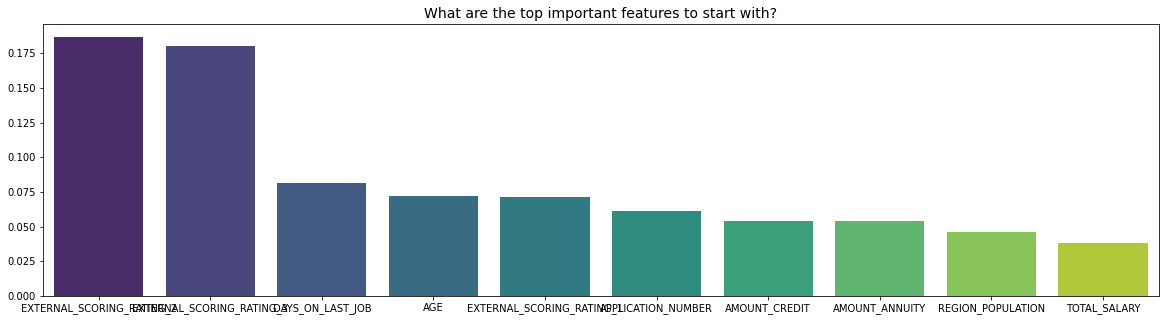

In [32]:
ntop = 10
importances = grid.best_estimator_.feature_importances_
idx = np.argsort(importances)[::-1][0:ntop]
feature_names = numerical_features.drop(["TARGET"], axis=1).columns.values

plt.figure(figsize=(20,5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [33]:
X = df_train_merged.drop(["TARGET"], axis=1)
ind = df_train_merged["APPLICATION_NUMBER"]
y = df_train_merged["TARGET"]
y = pd.concat([ind, y], axis=1)
y = y.set_index('APPLICATION_NUMBER')

In [34]:
x_train, x_valid = train_test_split(
    X, train_size=0.6, random_state=27, shuffle=True
)
y_train, y_valid = train_test_split(
    y, train_size=0.6, random_state=27, shuffle=True
)

x_valid, x_test = train_test_split(
    x_valid, train_size=0.5, random_state=72, shuffle=True
)
y_valid, y_test = train_test_split(
    y_valid, train_size=0.5, random_state=72, shuffle=True
)

In [35]:
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))
print("x_test.shape = {} rows, {} cols".format(*x_test.shape))
#print("x_public_lb.shape = {} rows, {} cols".format(*x_public_lb.shape))

x_train.shape = 66055 rows, 40 cols
x_valid.shape = 22019 rows, 40 cols
x_test.shape = 22019 rows, 40 cols


In [36]:
model = xgb.XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=75)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
#model = cb.CatBoostClassifier(silent=True, random_state=21)
#model.fit(x_train, y_train)

In [38]:
train_score = roc_auc_score(y_train, model.predict(x_train))
valid_score = roc_auc_score(y_valid, model.predict(x_valid))
test_score = roc_auc_score(y_test, model.predict(x_test))


print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)}, Test-score: {round(test_score, 3)}")

Train-score: 0.52, Valid-score: 0.506, Test-score: 0.506


In [39]:
def evaluate_model(model, *args):
    """
    Оценка качества модели.

    Parameters
    ----------
    model: catboost.core.CatBoostClassifier
        Экземпляр обученного классификатора.

    args: pandas.core.frame.DataFrame
        Пары из обучающей выборки и вектора истинных ответов.
        Опциональные параметры.

    """
    eval_data = [(args[i], args[i+1]) for i in range(0, len(args), 2)]
    if eval_data:
        for sample, target in eval_data:
            y_pred = model.predict_proba(sample)[:, 1]
            score = roc_auc_score(target, y_pred)
            print(f"score = {round(score, 6)}")

In [40]:
evaluate_model(model, x_train, y_train, x_valid, y_valid)

score = 0.799842
score = 0.719074


In [41]:
x_train

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,...,EDUCATION_LEVEL_Higher education,EDUCATION_LEVEL_Incomplete higher,EDUCATION_LEVEL_Lower secondary,EDUCATION_LEVEL_Secondary / secondary special,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Unknown,FAMILY_STATUS_Widow
17327,123628434,0.0,292500.0,254700.0,25321.5,0.006305,20135.0,12138.0,16.0,1.0,...,1,0,0,0,0,1,0,0,0,0
39053,123632049,1.0,112500.0,675000.0,20538.0,0.014520,14798.0,4624.0,9.0,0.0,...,0,0,0,1,1,0,0,0,0,0
90976,123548395,1.0,135000.0,1288350.0,37800.0,0.035792,14613.0,1795.0,16.0,0.0,...,0,0,0,1,0,1,0,0,0,0
89366,123626067,4.0,202500.0,495985.5,24124.5,0.010966,12859.0,3662.0,9.0,1.0,...,0,0,0,1,0,1,0,0,0,0
40940,123499208,0.0,42750.0,137538.0,8023.5,0.014520,18855.0,6943.0,9.0,0.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,123478828,2.0,112500.0,343800.0,16155.0,0.010643,11756.0,584.0,9.0,0.0,...,0,0,0,1,0,1,0,0,0,0
65336,123595728,0.0,234000.0,747000.0,39928.5,0.028663,21032.0,14060.0,9.0,0.0,...,0,0,0,1,0,1,0,0,0,0
14879,123692353,2.0,148500.0,781920.0,23706.0,0.024610,12681.0,588.0,8.0,1.0,...,1,0,0,0,0,1,0,0,0,0
36680,123574738,0.0,135000.0,327024.0,17059.5,0.010006,16280.0,270.0,9.0,1.0,...,1,0,0,0,0,0,1,0,0,0


In [42]:
df_test_merged

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,...,EDUCATION_LEVEL_Higher education,EDUCATION_LEVEL_Incomplete higher,EDUCATION_LEVEL_Lower secondary,EDUCATION_LEVEL_Secondary / secondary special,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Unknown,FAMILY_STATUS_Widow
0,123724268,0.0,117000.0,1125000.0,32895.0,0.028663,16007.0,2646.0,20.0,0.0,...,0,0,0,1,0,1,0,0,0,0
1,123456549,2.0,81000.0,312768.0,17095.5,0.019689,10315.0,459.0,9.0,0.0,...,0,0,0,1,0,1,0,0,0,0
2,123428178,2.0,157500.0,450000.0,22500.0,0.019101,13016.0,977.0,9.0,1.0,...,0,0,0,1,0,1,0,0,0,0
3,123619984,0.0,144900.0,514777.5,24939.0,0.018850,15755.0,2218.0,9.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,123671104,1.0,90000.0,254700.0,24939.0,0.015221,17743.0,9258.0,9.0,1.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165136,123487967,0.0,144900.0,514777.5,24939.0,0.018850,15755.0,2218.0,9.0,0.0,...,0,0,0,1,0,0,0,0,1,0
165137,123536402,0.0,135000.0,450000.0,16807.5,0.028663,18610.0,10398.0,23.0,0.0,...,0,0,0,1,0,0,0,1,0,0
165138,123718238,0.0,144900.0,514777.5,24939.0,0.018850,15755.0,2218.0,9.0,0.0,...,0,0,0,1,0,0,0,0,1,0
165139,123631557,0.0,112500.0,350181.0,36769.5,0.030755,20551.0,365243.0,9.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [43]:
y_pred = model.predict_proba(df_test_merged)[:, 1]

In [44]:
y_pred = pd.DataFrame(y_pred)

In [45]:
y_pred

,0
0,0.047528
1,0.104870
2,0.160016
3,0.041554
4,0.066106
...,...
165136,0.035341
165137,0.039380
165138,0.036495
165139,0.018265


In [46]:
y_pred = y_pred.rename({0: 'TARGET'}, axis=1)

In [47]:
df_test = pd.read_csv('/Kaggle/input/geekbrains-competitive-data-analysis/test.csv')
df_test = df_test.drop(['NAME_CONTRACT_TYPE'], axis=1)

In [48]:
df_test = pd.concat([df_test, y_pred], axis=1)

In [49]:
df_test

,APPLICATION_NUMBER,TARGET
0,123724268,0.047528
1,123456549,0.104870
2,123428178,0.160016
3,123619984,0.041554
4,123671104,0.066106
...,...,...
165136,123487967,0.035341
165137,123536402,0.039380
165138,123718238,0.036495
165139,123631557,0.018265


In [50]:
# 4.4. Экспорт результатов
import csv
filename = 'Kaldin_xgb_prof_7.csv'
df_test.to_csv(filename, index=None)

In [51]:
x_train, x_valid = train_test_split(
    X, train_size=0.7, random_state=27, shuffle=True
)
y_train, y_valid = train_test_split(
    y, train_size=0.7, random_state=27, shuffle=True
)

dtrain = xgb.DMatrix(x_train, label=y_train)
dvalid = xgb.DMatrix(x_valid, label=y_valid)

In [52]:
x_valid

,APPLICATION_NUMBER,CHILDRENS,TOTAL_SALARY,AMOUNT_CREDIT,AMOUNT_ANNUITY,REGION_POPULATION,AGE,DAYS_ON_LAST_JOB,OWN_CAR_AGE,FLAG_PHONE,...,EDUCATION_LEVEL_Higher education,EDUCATION_LEVEL_Incomplete higher,EDUCATION_LEVEL_Lower secondary,EDUCATION_LEVEL_Secondary / secondary special,FAMILY_STATUS_Civil marriage,FAMILY_STATUS_Married,FAMILY_STATUS_Separated,FAMILY_STATUS_Single / not married,FAMILY_STATUS_Unknown,FAMILY_STATUS_Widow
6863,123620325,0.0,208800.0,1575000.0,41548.5,0.031329,20798.0,13567.0,9.0,1.0,...,0,0,0,1,0,0,0,1,0,0
82301,123518406,2.0,157500.0,450000.0,22500.0,0.035792,15257.0,1690.0,9.0,0.0,...,0,0,0,1,0,1,0,0,0,0
82261,123428649,1.0,148500.0,646920.0,25065.0,0.014464,17741.0,5333.0,9.0,1.0,...,0,0,0,1,0,0,0,1,0,0
17909,123428477,1.0,135000.0,156384.0,14341.5,0.009175,13287.0,325.0,9.0,0.0,...,0,0,0,1,1,0,0,0,0,0
13295,123599076,1.0,157500.0,810000.0,23683.5,0.018209,10307.0,2987.0,9.0,1.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44877,123562976,1.0,157500.0,269982.0,29205.0,0.006629,12865.0,1873.0,14.0,0.0,...,1,0,0,0,0,1,0,0,0,0
101274,123672281,0.0,247500.0,824823.0,24246.0,0.022625,22681.0,365243.0,9.0,0.0,...,0,0,0,1,0,0,0,1,0,0
90117,123458931,1.0,171000.0,792162.0,40576.5,0.010276,10918.0,1310.0,20.0,0.0,...,0,0,0,1,0,1,0,0,0,0
56624,123459591,0.0,90000.0,202500.0,10125.0,0.011657,20277.0,365243.0,9.0,1.0,...,0,0,0,1,0,0,0,0,0,1


In [53]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": float(np.mean(y_train)),
    "eval_metric": "auc"
}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=100,
    verbose_eval=100
)

[0]	train-auc:0.68820	valid-auc:0.67921
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[100]	train-auc:0.73386	valid-auc:0.71588
[200]	train-auc:0.74936	valid-auc:0.72150
[300]	train-auc:0.76109	valid-auc:0.72383
[400]	train-auc:0.77181	valid-auc:0.72517
[500]	train-auc:0.78079	valid-auc:0.72567
Stopping. Best iteration:
[463]	train-auc:0.77752	valid-auc:0.72597



In [54]:
xgb_params = deepcopy(params)
xgb_params["n_estimators"] = 100

model = xgb.XGBClassifier(**xgb_params)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.08052942321416985, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              eta=0.01, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
y_score = model.predict_proba(x_valid)[:, 1]
score = roc_auc_score(y_valid, y_score)

print(f"Valid score = {round(score, 4)}")

Valid score = 0.7159


In [56]:
y_score

array([0.04006565, 0.07550054, 0.1269609 , ..., 0.10388998, 0.06033981,
       0.08058887], dtype=float32)

In [57]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

estimator = PermutationImportance(
    model, scoring="roc_auc", random_state=27
)
importance = estimator.fit(x_valid.fillna(-9999), y_valid)

In [58]:
show_weights(importance, feature_names=x_valid.columns.tolist(), top=x_valid.shape[1])

Weight,Feature
0.0671 ± 0.0069,EXTERNAL_SCORING_RATING_3
0.0622 ± 0.0071,EXTERNAL_SCORING_RATING_2
0.0159 ± 0.0022,EXTERNAL_SCORING_RATING_1
0.0102 ± 0.0038,DAYS_ON_LAST_JOB
0.0029 ± 0.0015,EDUCATION_LEVEL_Higher education
0.0024 ± 0.0007,AGE
0.0022 ± 0.0007,EDUCATION_LEVEL_Secondary / secondary special
0.0010 ± 0.0011,AMOUNT_CREDIT
0.0010 ± 0.0009,AMOUNT_ANNUITY
0.0007 ± 0.0007,OWN_CAR_AGE


In [59]:
def _predict(estimator, x_valid):
    if hasattr(estimator, "predict_proba"):
        y_pred = estimator.predict_proba(x_valid)[:, 1]
    else:
        y_pred = estimator.predict(x_valid)

    return y_pred

def calculate_permutation_importance(estimator,
                                     metric: callable,
                                     x_valid: pd.DataFrame,
                                     y_valid: pd.DataFrame,
                                     maximize: bool = True
                                     ) -> pd.Series:
    """
    Вычисление важности признаков на основе перестановочного
    критерия (permutation importance).

    Parameters
    ----------
    estimator: sklearn-API estimator
        Модель машинного обучения, выполненная в sklearn-API.
        Модель должны быть обученной (применен метод `fit`).

    metric: callable
        Функция для оценки качества прогнозов, функция принимает
        2 аргумента: вектор истинных ответов и вектор прогнозов.

    x_valid: pandas.core.frame.DataFrame
        Матрица признаков для оценки качества модели.

    y_valid: pandas.core.frame.Series
        Вектор целевой переменной для оценки качества модели.

    maximize: bool, optional, default = True
        Флаг максимизации метрики качества.
        Опциональный параметр, по умолчанию, равен `True`.
        Если `True`, значит чем выше значение метрики качества,
        тем лучше. Если `False` - иначе.

    """
    y_pred = _predict(estimator, x_valid)
    base_score = metric(y_valid, y_pred)
    scores, delta = {}, {}

    for feature in x_valid.columns:
        x_valid_ = x_valid.copy(deep=True)
        x_valid_[feature] = np.random.permutation(x_valid_[feature])

        y_pred = _predict(estimator, x_valid_)
        feature_score = metric(y_valid, y_pred)

        if maximize:
            delta[feature] = base_score - feature_score
        else:
            delta[feature] = feature_score - base_score

        scores[feature] = feature_score

    scores, delta = pd.Series(scores), pd.Series(delta)
    scores = scores.sort_values(ascending=False)
    delta = delta.sort_values(ascending=False)

    return scores, delta

In [60]:
scores, importance = calculate_permutation_importance(
    estimator, roc_auc_score, x_valid, y_valid
)

In [61]:
importance

EXTERNAL_SCORING_RATING_3                        7.699417e-02
EXTERNAL_SCORING_RATING_2                        6.032009e-02
EXTERNAL_SCORING_RATING_1                        1.477680e-02
DAYS_ON_LAST_JOB                                 1.204393e-02
EDUCATION_LEVEL_Higher education                 2.815842e-03
EDUCATION_LEVEL_Secondary / secondary special    2.132407e-03
AGE                                              2.052798e-03
NAME_CONTRACT_TYPE_Cash                          1.166538e-03
GENDER_F                                         1.148084e-03
OWN_CAR_AGE                                      5.071728e-04
AMT_REQ_CREDIT_BUREAU_YEAR                       4.974101e-04
AMOUNT_CREDIT                                    4.899257e-04
AMOUNT_ANNUITY                                   3.205843e-04
GENDER_M                                         2.830645e-04
AMT_REQ_CREDIT_BUREAU_MON                        1.361762e-04
Credit_card_marital                              8.814645e-05
FAMILY_S

In [62]:
scores, importance = calculate_permutation_importance(
    model, roc_auc_score, x_valid, y_valid
)

In [63]:
to_drop = importance[importance<=0].index.tolist()
dtrain = xgb.DMatrix(x_train.drop(to_drop, axis=1), label=y_train)
dvalid = xgb.DMatrix(x_valid.drop(to_drop, axis=1), label=y_valid)

In [64]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    early_stopping_rounds=50,
    verbose_eval=100
)

[0]	train-auc:0.68763	valid-auc:0.67882
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[100]	train-auc:0.73276	valid-auc:0.71673
[200]	train-auc:0.74766	valid-auc:0.72131
[300]	train-auc:0.75886	valid-auc:0.72382
Stopping. Best iteration:
[347]	train-auc:0.76303	valid-auc:0.72507



In [65]:
x_train2 = x_train.drop(to_drop, axis=1)
x_valid2 = x_valid.drop(to_drop, axis=1)


In [66]:
model = xgb.XGBClassifier(random_state=42, learning_rate=0.1, n_estimators=75)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
train_score = roc_auc_score(y_train, model.predict(x_train))
valid_score = roc_auc_score(y_valid, model.predict(x_valid))
test_score = roc_auc_score(y_test, model.predict(x_test))


print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 3)}, Test-score: {round(test_score, 3)}")

Train-score: 0.517, Valid-score: 0.505, Test-score: 0.508


In [68]:
evaluate_model(model, x_train, y_train, x_valid, y_valid)

score = 0.792559
score = 0.719688


In [69]:
y_pred = model.predict_proba(df_test_merged)[:, 1]

In [70]:
y_pred = pd.DataFrame(y_pred)

In [71]:
y_pred

,0
0,0.043929
1,0.184683
2,0.168000
3,0.034545
4,0.049160
...,...
165136,0.030745
165137,0.049975
165138,0.033445
165139,0.021613


In [72]:
y_pred = y_pred.rename({0: 'TARGET'}, axis=1)
df_test = pd.read_csv('/Kaggle/input/geekbrains-competitive-data-analysis/test.csv')
df_test = df_test.drop(['NAME_CONTRACT_TYPE'], axis=1)
df_test = pd.concat([df_test, y_pred], axis=1)

In [73]:
# 4.4. Экспорт результатов
import csv
filename = 'Kaldin_xgb_prof_6.csv'
df_test.to_csv(filename, index=None)